In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import json
import tensorflow as tf


In [2]:
filename = "./data/train.json"
with open(filename, "r") as file:
    json_data = file.read()
samples = json.loads(json_data)

In [21]:
n = len(samples)
n1 = int(n*0.84414)
n_icebergs = sum(1 if sample["is_iceberg"] == 0 else 0 for sample in samples[0:n1])
n_ships = sum(1 if sample["is_iceberg"] == 1 else 0 for sample in samples[0:n1])
print("number of samples:   {}".format(n1))
print("number of icebergs:  {}".format(n_icebergs))
print("number of ships:     {}".format(n_ships))

number of samples:   1354
number of icebergs:  677
number of ships:     677


(u'51e96360', 'iceberg')


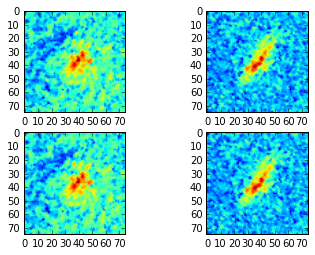

In [24]:
picked = 138
sample = samples[picked]
band_1 = np.array(sample["band_1"]).reshape((75,75))
band_2 = np.array(sample["band_2"]).reshape((75,75))
label = "ship" if sample["is_iceberg"] == 0 else "iceberg"
print(sample["id"], label)
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(band_1)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(band_2)
ax3 = fig.add_subplot(2,2,3)
ax3.imshow((band_1-band_1.mean())/(band_1.max()-band_1.min()))
ax4 = fig.add_subplot(2,2,4)
ax4.imshow((band_2-band_2.mean())/(band_2.max()-band_2.min()))

((75, 75, 3), dtype('float64'))


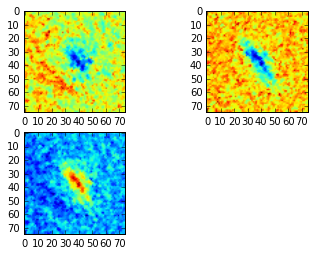

In [26]:
image1 = np.dstack((band_1, band_2, band_1+band_2))
image = np.flip(image1, 0)
# image = image1
print(image.shape, image.dtype)
fig1 = plt.figure(2)

ax1 = fig1.add_subplot(2,2,1)
ax1.imshow(0-image[:,:,0])

ax2 = fig1.add_subplot(2,2,2)
ax2.imshow(0-image[:,:,1])

ax3 = fig1.add_subplot(2,2,3)
ax3.imshow(image[:,:,2])

# ax4 = fig1.add_subplot(2,2,4)
# ax4.imshow(image[])